In [2]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [3]:
def data_frame(path):
    class_paths = []
    classes = []

    for label in os.listdir(path):
        class_dir = os.path.join(path, label)
        if os.path.isdir(class_dir):  
            for image in os.listdir(class_dir):
                class_paths.append(os.path.join(class_dir, image))
                classes.append(label)

    df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return df

In [10]:
def visualize_class_rows(df, random_seed=None):
    if random_seed is not None:
        random.seed(random_seed)

    classes = sorted(df['Class'].unique())
    num_images_per_class = 5
    image_size = (224, 224)

    fig = plt.figure(figsize=(num_images_per_class * 2, len(classes) * 2))

    # Define gridspec with a narrow first column
    gs = gridspec.GridSpec(len(classes), num_images_per_class + 1, 
                           width_ratios=[0.3] + [1]*num_images_per_class, 
                           wspace=0.05, hspace=0.05)

    for row_idx, cls in enumerate(classes):
        class_df = df[df['Class'] == cls]
        selected_paths = random.sample(list(class_df['Class Path'].values), 
                                       min(num_images_per_class, len(class_df)))

        for col_idx in range(num_images_per_class + 1):
            ax = fig.add_subplot(gs[row_idx, col_idx])
            ax.axis('off')

            if col_idx == 0:
                ax.text(0.5, 0.5, cls, fontsize=18, ha='center', va='center', rotation=90)
                ax.set_facecolor('white')
            elif col_idx - 1 < len(selected_paths):
                img_path = selected_paths[col_idx - 1]
                image = Image.open(img_path).convert('RGB').resize(image_size)
                ax.imshow(image)
            else:
                ax.imshow([[1]])

    plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)
    plt.show()


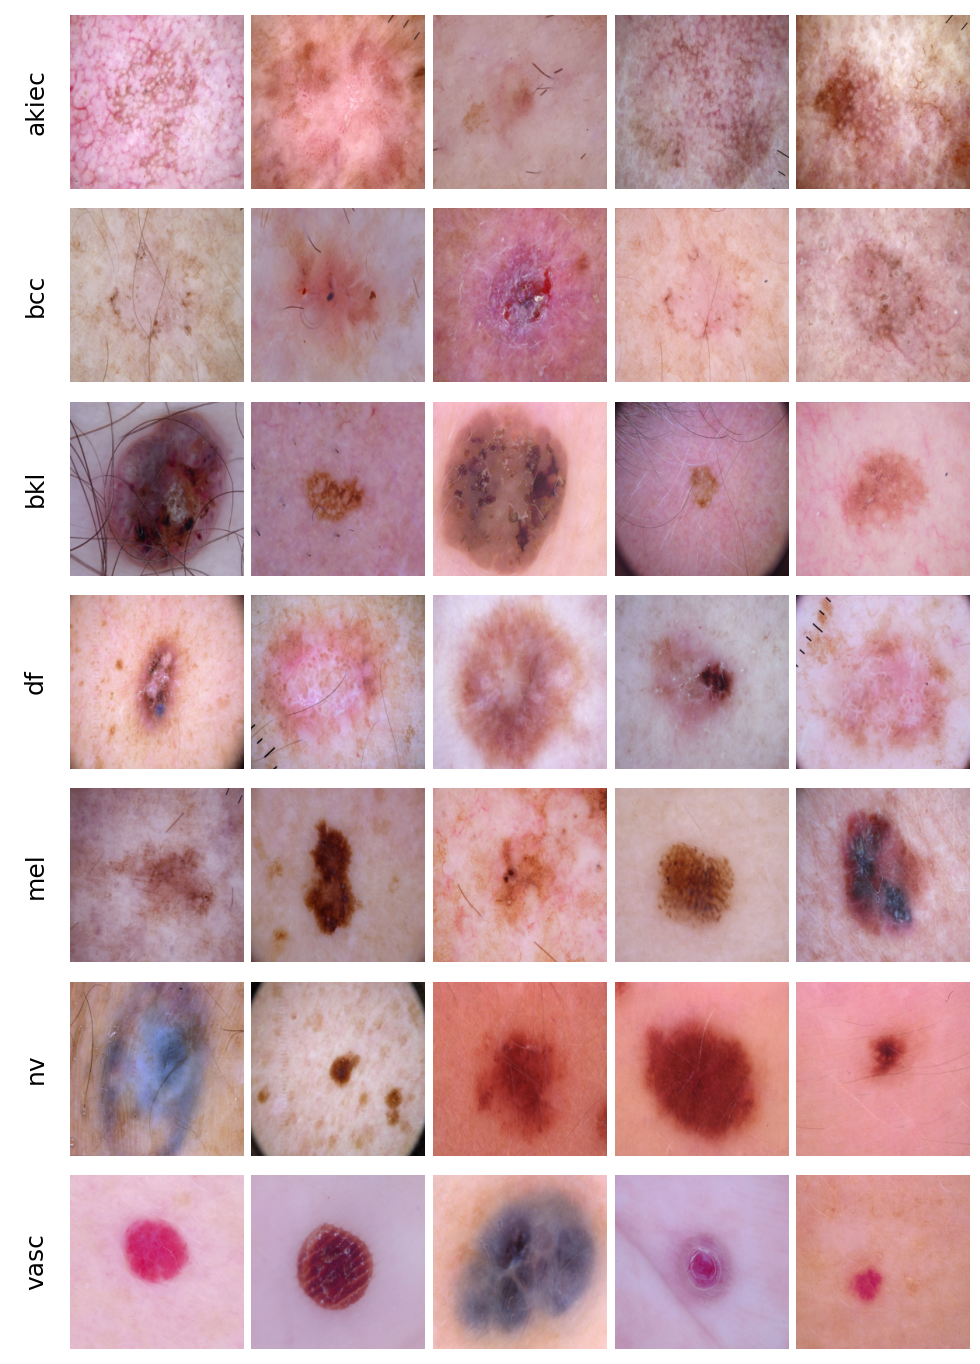

In [8]:
dataframe = data_frame(r'HAM10000_organized')
visualize_class_rows(dataframe, random_seed=100)

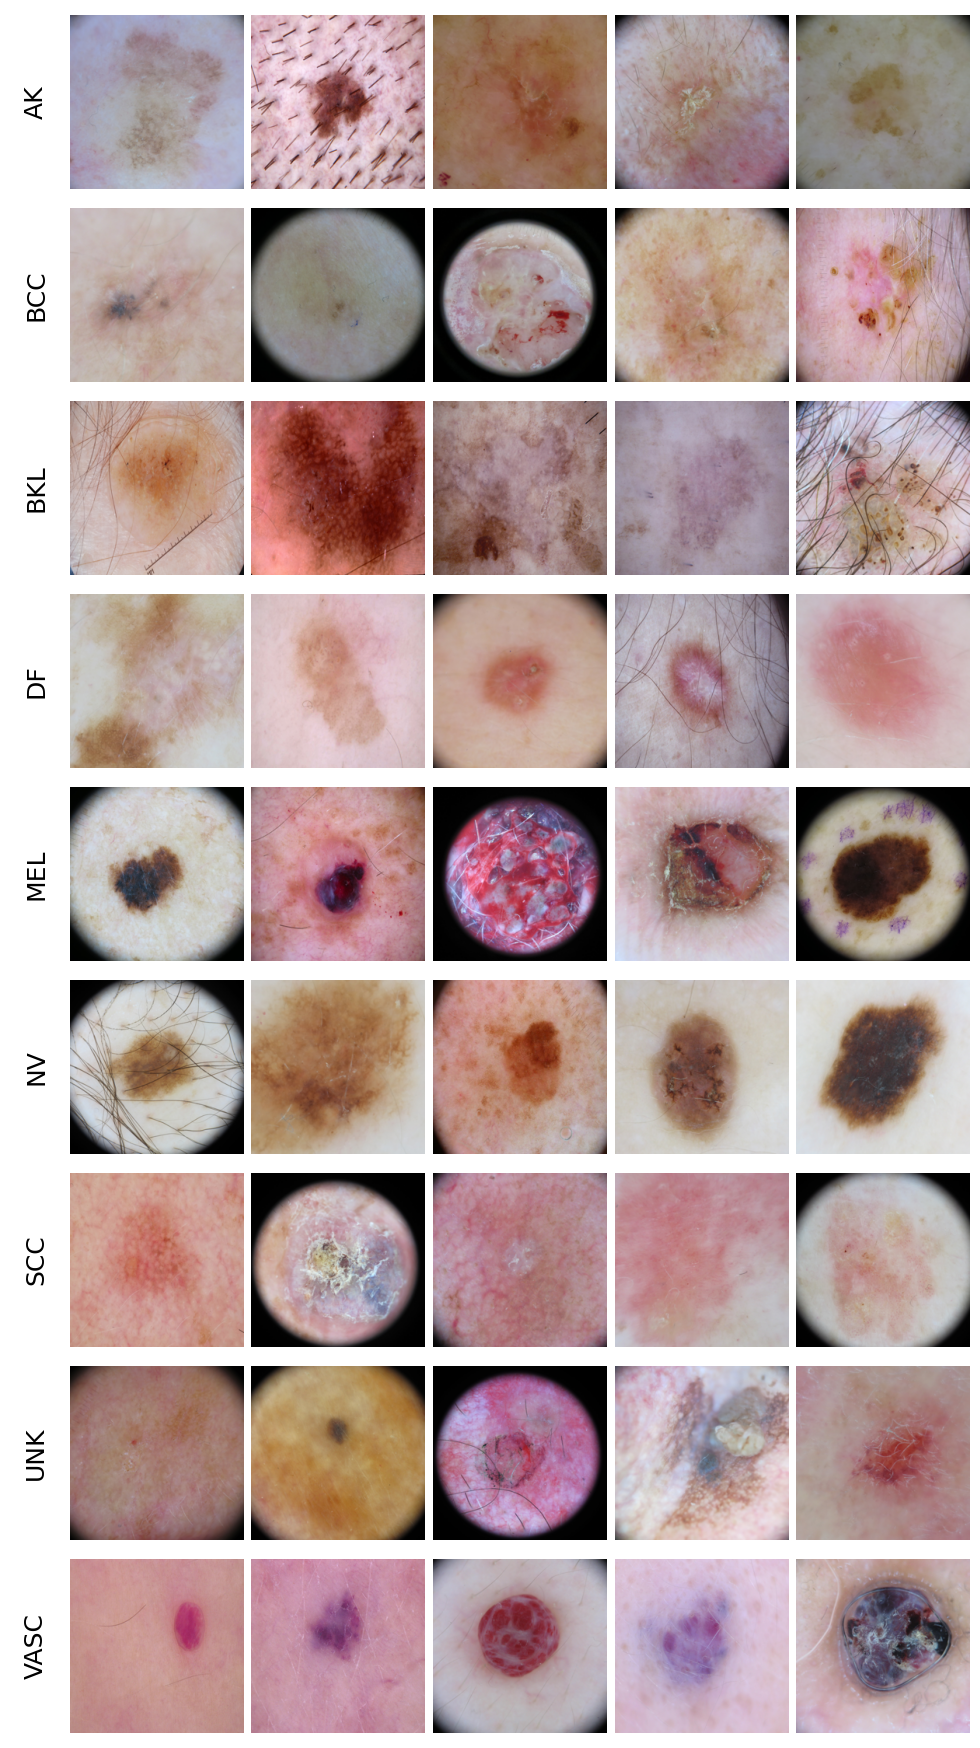

In [9]:
dataframe = data_frame(r'ISIC_2019_organized')
visualize_class_rows(dataframe, random_seed=42)

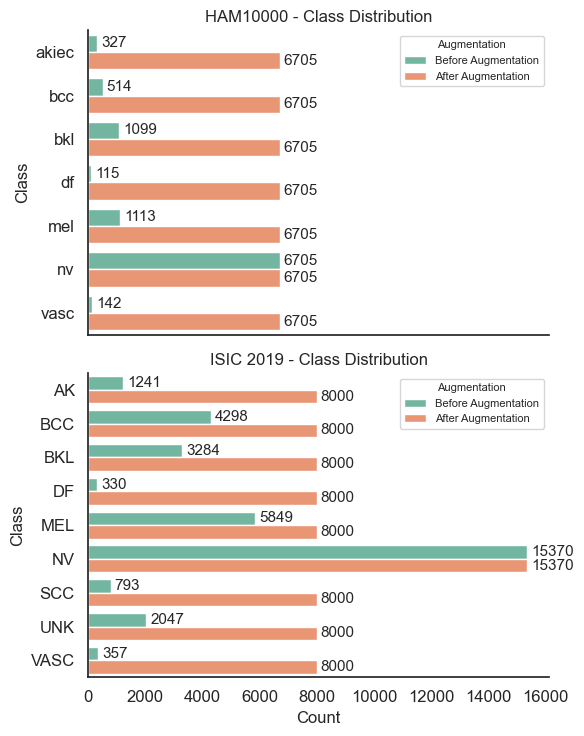

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ham_df = data_frame(r'HAM10000_organized')
ham_aug_df = data_frame(r"C:\Users\Faysal Ahmmed\Desktop\Skin Cancer Thesis Final Codes\HAM10000 Dataset\HAM10000_organized")
isic_df = data_frame(r'ISIC_2019_organized')
isic_aug_df = data_frame(r"C:\Users\Faysal Ahmmed\Desktop\Skin Cancer Thesis Final Codes\ISIC_2019 Dataset\ISIC_2019_organized")

# Set seaborn style
sns.set(style="white")

# Count class distributions
def get_class_counts(df, dataset_name, aug_status):
    counts = df['Class'].value_counts().sort_index()
    return pd.DataFrame({
        'Class': counts.index,
        'Count': counts.values,
        'Dataset': dataset_name,
        'Augmentation': aug_status
    })

# Prepare combined DataFrame
ham_before = get_class_counts(ham_df, 'HAM10000', 'Before Augmentation')
ham_after = get_class_counts(ham_aug_df, 'HAM10000', 'After Augmentation')
isic_before = get_class_counts(isic_df, 'ISIC 2019', 'Before Augmentation')
isic_after = get_class_counts(isic_aug_df, 'ISIC 2019', 'After Augmentation')

combined_df = pd.concat([ham_before, ham_after, isic_before, isic_after], ignore_index=True)

# Create subplots with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Plot for HAM10000
sns.barplot(
    data=combined_df[combined_df['Dataset'] == 'HAM10000'],
    x='Count', y='Class', hue='Augmentation', palette='Set2', ax=axes[0]
)
axes[0].set_title("HAM10000 - Class Distribution", fontsize=12)
axes[0].set_ylabel("Class", fontsize=12)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].legend(title='Augmentation', loc='upper right', fontsize=8, title_fontsize=8)
axes[0].set_xlabel("")
sns.despine(ax=axes[0], top=True, right=True)

# Plot for ISIC 2019
sns.barplot(
    data=combined_df[combined_df['Dataset'] == 'ISIC 2019'],
    x='Count', y='Class', hue='Augmentation', palette='Set2', ax=axes[1]
)
axes[1].set_title("ISIC 2019 - Class Distribution", fontsize=12)
axes[1].set_xlabel("Count", fontsize=12)
axes[1].set_ylabel("Class", fontsize=12)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].legend(title='Augmentation', loc='upper right', fontsize=8, title_fontsize=8)
sns.despine(ax=axes[1], top=True, right=True)

# Annotate bars
for ax in axes:
    for p in ax.patches:
        width = int(p.get_width())
        if width > 0:
            ax.annotate(f'{width}',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center',
                        fontsize=11, xytext=(3, 0),
                        textcoords='offset points')

# Final layout
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()
